In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

사용한 파이썬 라이브러리 목록

: pandas, numpy, matplotlib

#  GDP_Deflator

- GDP deflator

- 2015년의 값을 기준(100)으로 (% 단위)

- 데이터 링크(world bank)
: https://data.worldbank.org/indicator/NY.GDP.DEFL.ZS

In [235]:
gdp_deflator = pd.read_csv("raw_data/gdp deflator.csv")
gdp_deflator = gdp_deflator[(gdp_deflator['Country Code'] == 'KOR') | (gdp_deflator['Country Code'] == 'JPN') | (gdp_deflator['Country Code'] == 'USA')].transpose()
gdp_deflator.to_csv("raw_data/gdp deflator2.csv", header=False)

In [236]:
gdp_deflator = pd.read_csv("raw_data/gdp deflator2.csv")

In [237]:
year = gdp_deflator['Country Name'].iloc[3:].astype(int)
korea_gdp_deflator = gdp_deflator['Korea, Rep.'].iloc[3:].astype(float)
japan_gdp_deflator = gdp_deflator['Japan'].iloc[3:].astype(float)
usa_gdp_deflator = gdp_deflator['United States'].iloc[3:].astype(float)


In [238]:
gdp_deflator = pd.concat([year,korea_gdp_deflator, japan_gdp_deflator, usa_gdp_deflator], axis=1)
gdp_deflator.columns = ['Year', 'Korea', 'Japan', 'USA']
gdp_deflator

,Year,Korea,Japan,USA
3,1960,0.859509,22.579960,15.715084
4,1961,0.970489,24.337971,15.927262
5,1962,1.132788,25.360063,16.125498
6,1963,1.472677,26.757522,16.301006
7,1964,1.918929,28.183351,16.546163
...,...,...,...,...
59,2016,101.986039,100.419944,101.049247
60,2017,104.252965,100.345283,102.949042
61,2018,104.756454,100.349928,105.420829
62,2019,103.877206,100.993023,107.302750


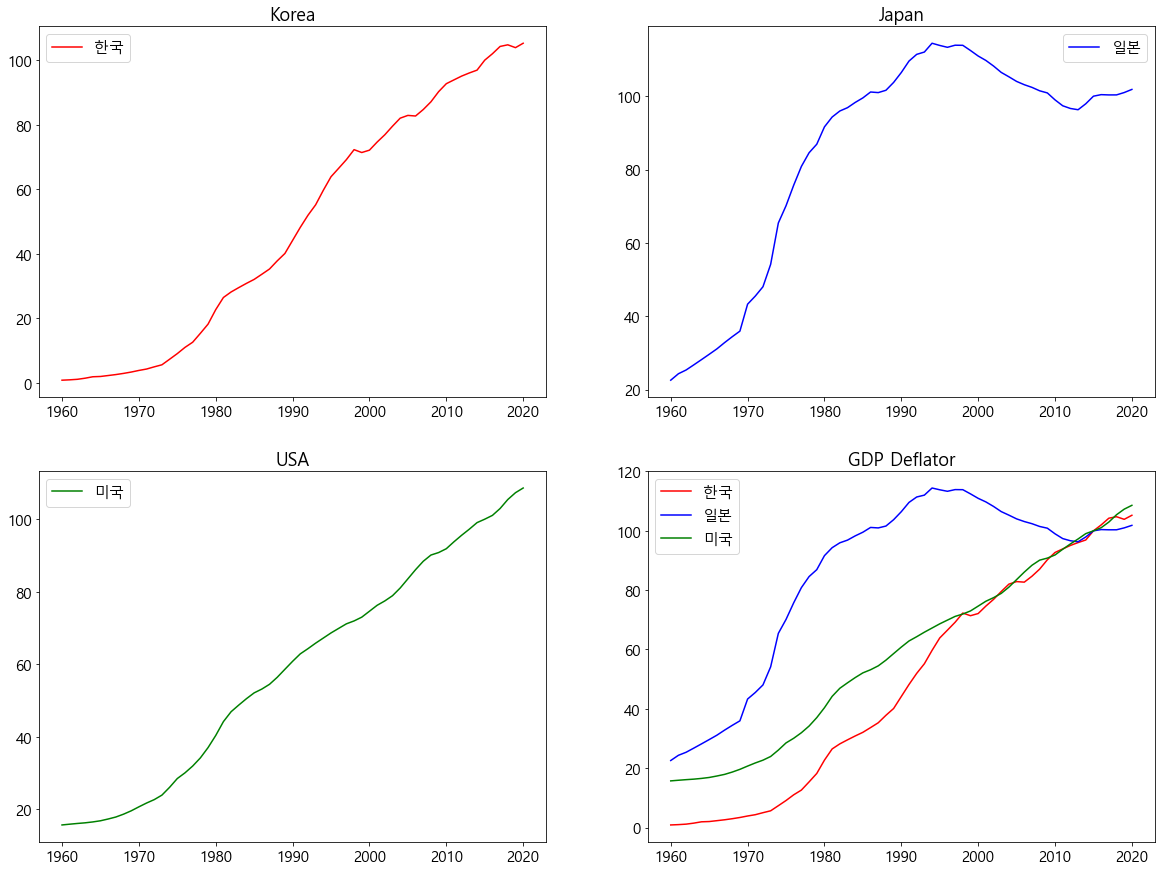

In [239]:
plt.rc("font", family='Malgun Gothic')
plt.rc('font', size=15) 
plt.figure(figsize=(20,15))

ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)

ax1.plot(gdp_deflator['Year'], gdp_deflator['Korea'], label='한국', color='red')
ax1.set_title('Korea')
ax1.legend()

ax2.plot(gdp_deflator['Year'], gdp_deflator['Japan'], label='일본', color='blue')
ax2.set_title('Japan')
ax2.legend()

ax3.plot(gdp_deflator['Year'], gdp_deflator['USA'], label='미국', color='green')
ax3.set_title('USA')
ax3.legend()

ax4.plot(gdp_deflator['Year'], gdp_deflator['Korea'], label='한국', color='red')
ax4.plot(gdp_deflator['Year'], gdp_deflator['Japan'], label='일본', color='blue')
ax4.plot(gdp_deflator['Year'], gdp_deflator['USA'], label='미국', color='green')

ax4.set_title('GDP Deflator')
ax4.legend()

In [240]:
gdp_deflator.to_csv('preprocessed_data/gdp_deflator.csv', index=False)

# Nominal GDP

- 명목 gdp
- current US$ (현재 미달러화 기준)
- 데이터 링크(world bank) : https://data.worldbank.org/indicator/NY.GDP.MKTP.CD

In [245]:
gdp =  pd.read_csv("raw_data/gdp.csv")
gdp = gdp[(gdp['Country Code'] == 'KOR') | (gdp['Country Code'] == 'JPN') | (gdp['Country Code'] == 'USA')].transpose()
gdp.to_csv("raw_data/gdp2.csv", header=False)

In [246]:
nominal_gdp =  pd.read_csv("raw_data/gdp2.csv")
nominal_gdp.head()

,Country Name,Japan,"Korea, Rep.",United States
0,Country Code,JPN,KOR,USA
1,Indicator Name,GDP (current US$),GDP (current US$),GDP (current US$)
2,Indicator Code,NY.GDP.MKTP.CD,NY.GDP.MKTP.CD,NY.GDP.MKTP.CD
3,1960,44307342950.0,3958190759.0,543300000000.0
4,1961,53508617739.0,2417558289.0,563300000000.0


In [247]:
year = nominal_gdp['Country Name'].iloc[3:].astype(int)
korea_nominal_gdp = nominal_gdp['Korea, Rep.'].iloc[3:].astype(float)
japan_nominal_gdp = nominal_gdp['Japan'].iloc[3:].astype(float)
usa_nominal_gdp = nominal_gdp['United States'].iloc[3:].astype(float)

In [250]:
nominal_gdp = pd.concat([year,korea_nominal_gdp, japan_nominal_gdp, usa_nominal_gdp], axis=1)
nominal_gdp.columns = ['Year', 'Korea', 'Japan', 'USA']
nominal_gdp

,Year,Korea,Japan,USA
3,1960,3.958191e+09,4.430734e+10,5.433000e+11
4,1961,2.417558e+09,5.350862e+10,5.633000e+11
5,1962,2.814319e+09,6.072302e+10,6.051000e+11
6,1963,3.988785e+09,6.949813e+10,6.386000e+11
7,1964,3.458939e+09,8.174901e+10,6.858000e+11
...,...,...,...,...
59,2016,1.500110e+12,5.003680e+12,1.874510e+13
60,2017,1.623900e+12,4.930840e+12,1.954300e+13
61,2018,1.724850e+12,5.036890e+12,2.061190e+13
62,2019,1.651420e+12,5.148780e+12,2.143320e+13


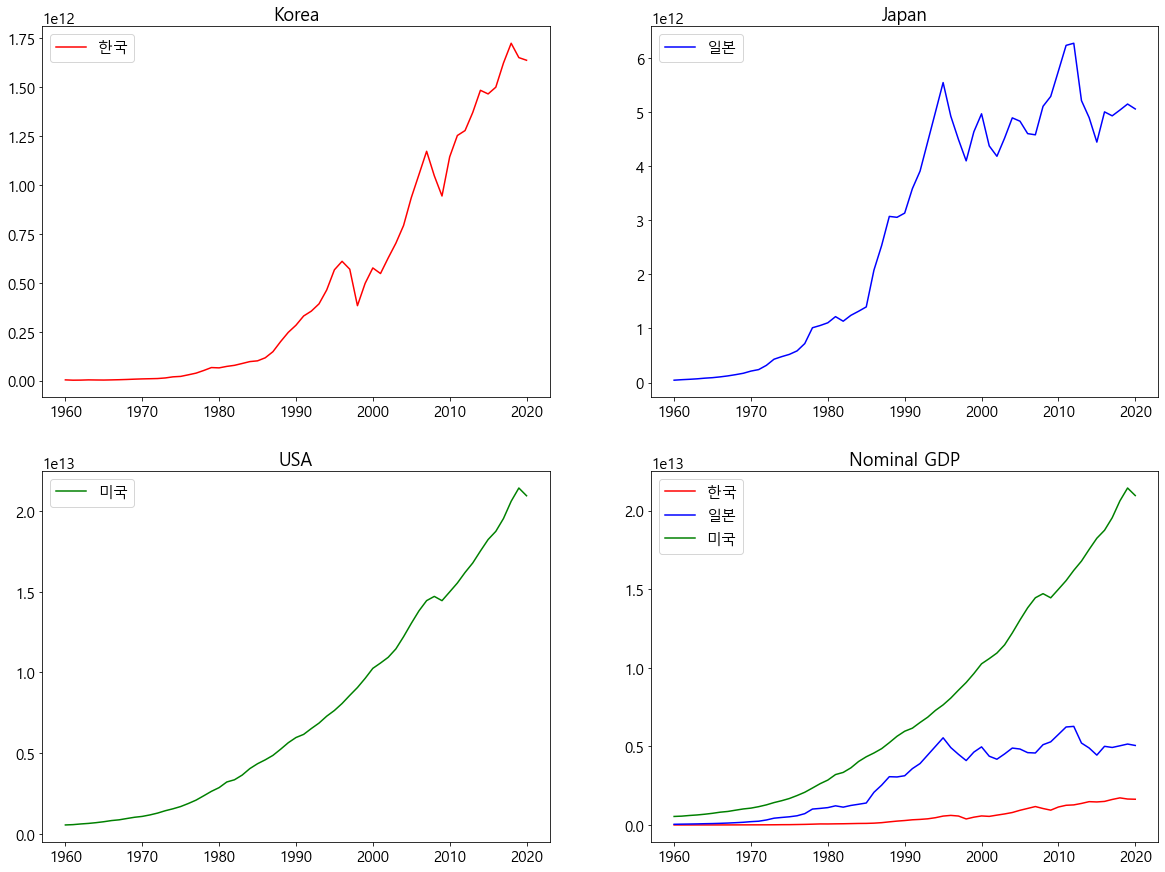

In [252]:
plt.rc("font", family='Malgun Gothic')
plt.rc('font', size=15) 
plt.figure(figsize=(20,15))

ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)

ax1.plot(nominal_gdp['Year'], nominal_gdp['Korea'], label='한국', color='red')
ax1.set_title('Korea')
ax1.legend()

ax2.plot(nominal_gdp['Year'], nominal_gdp['Japan'], label='일본', color='blue')
ax2.set_title('Japan')
ax2.legend()

ax3.plot(nominal_gdp['Year'],nominal_gdp['USA'], label='미국', color='green')
ax3.set_title('USA')
ax3.legend()

ax4.plot(nominal_gdp['Year'], nominal_gdp['Korea'], label='한국', color='red')
ax4.plot(nominal_gdp['Year'], nominal_gdp['Japan'], label='일본', color='blue')
ax4.plot(nominal_gdp['Year'],nominal_gdp['USA'], label='미국', color='green')

ax4.set_title('Nominal GDP')
ax4.legend()

In [260]:
nominal_gdp.to_csv('preprocessed_data/nominal_data.csv', index=False)

# gdp deflator & nominal gdp >>> Real GDP

GDP deflator = (명목 GDP / 실질 GDP) X 100


위의 gdp deflator 식에 따라 실질 gdp 값을 계산하여 사용

In [255]:
korea_real_gdp = nominal_gdp['Korea'].div(gdp_deflator['Korea']/100)
japan_real_gdp = nominal_gdp['Japan'].div(gdp_deflator['Japan']/100)
usa_real_gdp = nominal_gdp['USA'].div(gdp_deflator['USA']/100)

In [258]:
real_gdp = pd.concat([year, korea_real_gdp, japan_real_gdp, usa_real_gdp], axis=1)
real_gdp.rename(columns={'Country Name' : 'Year'}, inplace=True)
real_gdp

,Year,Korea,Japan,USA
3,1960,4.605179e+11,1.962242e+11,3.457188e+12
4,1961,2.491073e+11,2.198565e+11,3.536703e+12
5,1962,2.484417e+11,2.394435e+11,3.752442e+12
6,1963,2.708526e+11,2.597331e+11,3.917550e+12
7,1964,1.802536e+11,2.900613e+11,4.144768e+12
...,...,...,...,...
59,2016,1.470897e+12,4.982755e+12,1.855046e+13
60,2017,1.557654e+12,4.913873e+12,1.898318e+13
61,2018,1.646533e+12,5.019326e+12,1.955202e+13
62,2019,1.589781e+12,5.098154e+12,1.997451e+13


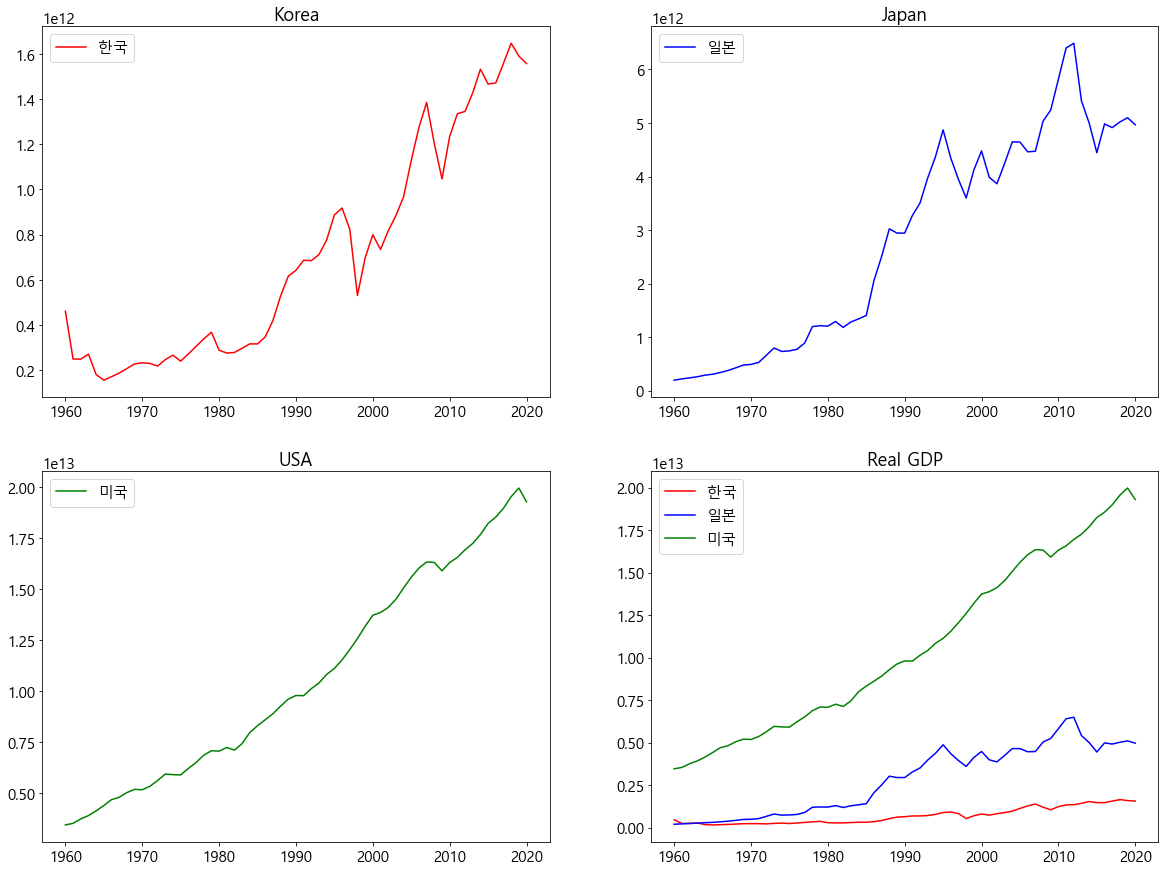

In [259]:
plt.rc("font", family='Malgun Gothic')
plt.rc('font', size=15) 
plt.figure(figsize=(20,15))

ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)

ax1.plot(year, korea_real_gdp, label='한국', color='red')
ax1.set_title('Korea')
ax1.legend()

ax2.plot(year, japan_real_gdp, label='일본', color='blue')
ax2.set_title('Japan')
ax2.legend()

ax3.plot(year,usa_real_gdp, label='미국', color='green')
ax3.set_title('USA')
ax3.legend()

ax4.plot(year, korea_real_gdp, label='한국', color='red')
ax4.plot(year, japan_real_gdp, label='일본', color='blue')
ax4.plot(year,usa_real_gdp, label='미국', color='green')

ax4.set_title('Real GDP')
ax4.legend()


In [261]:
real_gdp.to_csv("preprocessed_data/real_gdp.csv", index=False)

# Real GDP 로그 변환

회귀분석 식에 실제 사용되는 데이터는 ln로그를 취한 수치이기 때문에 실질 GDP값에 ln로그를 취함

In [269]:
real_gdp_log = pd.concat([year, np.log(korea_real_gdp), np.log(japan_real_gdp), np.log(usa_real_gdp)], axis=1)
real_gdp_log.rename(columns={'Country Name' : 'Year'}, inplace=True)
real_gdp_log


,Year,Korea,Japan,USA
3,1960,26.855618,26.002524,28.871477
4,1961,26.241150,26.116241,28.894216
5,1962,26.238474,26.201583,28.953428
6,1963,26.324841,26.282920,28.996488
7,1964,25.917631,26.393358,29.052868
...,...,...,...,...
59,2016,28.016894,29.237004,30.551516
60,2017,28.074202,29.223084,30.574574
61,2018,28.129693,29.244317,30.604100
62,2019,28.094617,29.259900,30.625478


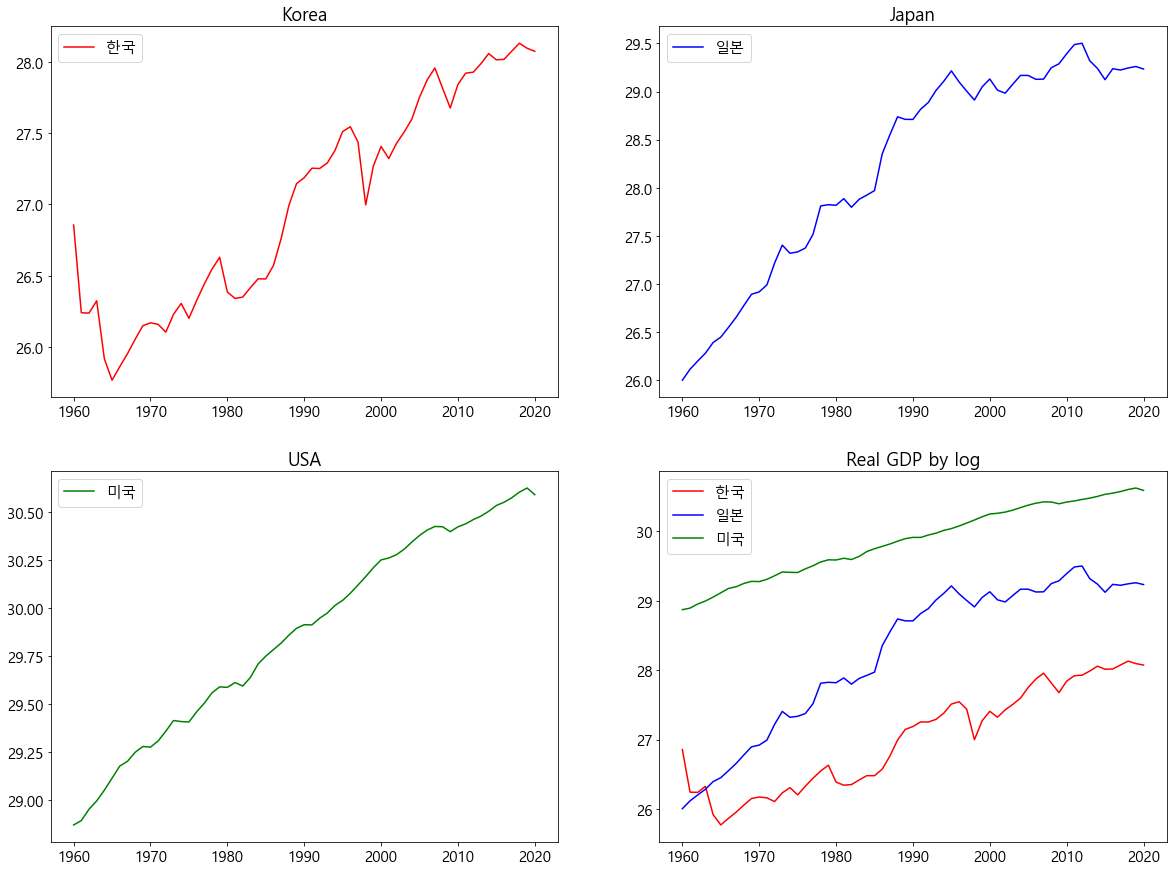

In [270]:
plt.rc("font", family='Malgun Gothic')
plt.rc('font', size=15) 
plt.figure(figsize=(20,15))

ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)

ax1.plot(real_gdp_log['Year'], real_gdp_log['Korea'], label='한국', color='red')
ax1.set_title('Korea')
ax1.legend()

ax2.plot(real_gdp_log['Year'], real_gdp_log['Japan'], label='일본', color='blue')
ax2.set_title('Japan')
ax2.legend()

ax3.plot(real_gdp_log['Year'], real_gdp_log['USA'], label='미국', color='green')
ax3.set_title('USA')
ax3.legend()

ax4.plot(real_gdp_log['Year'], real_gdp_log['Korea'], label='한국', color='red')
ax4.plot(real_gdp_log['Year'], real_gdp_log['Japan'], label='일본', color='blue')
ax4.plot(real_gdp_log['Year'], real_gdp_log['USA'], label='미국', color='green')

ax4.set_title('Real GDP by log')
ax4.legend()


In [271]:
real_gdp_log.to_csv("preprocessed_data/real_gdp_log.csv", index=False)

# Employment

- Employment(고용수)

- 단위 : 1,000명

- 데이터 링크(OECD data) : https://data.oecd.org/emp/employment-rate.htm#indicator-chart
        
- 데이터 설명 

: Employment rates are defined as a measure of the extent to which available labour resources (people available to work) are being used. They are calculated as the ratio of the employed to the working age population. Employment rates are sensitive to the economic cycle, but in the longer term they are significantly affected by governments' higher education and income support policies and by policies that facilitate employment of women and disadvantaged groups. Employed people are those aged 15 or over who report that they have worked in gainful employment for at least one hour in the previous week or who had a job but were absent from work during the reference week. The working age population refers to people aged 15 to 64. This indicator is seasonally adjusted and it is measured in terms of thousand persons aged 15 and over; and in numbers of employed persons aged 15 to 64 as a percentage of working age population.


In [272]:
employment =  pd.read_csv("raw_data/employment.csv")
employment.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,JPN,EMP,TOT,THND_PER,A,1955,40895.83,NaN
1,JPN,EMP,TOT,THND_PER,A,1956,41705.00,NaN
2,JPN,EMP,TOT,THND_PER,A,1957,42796.67,NaN
3,JPN,EMP,TOT,THND_PER,A,1958,42973.33,NaN
4,JPN,EMP,TOT,THND_PER,A,1959,43356.67,NaN


In [285]:
japan_employment = employment.loc[employment['LOCATION'] == 'JPN'][['TIME', 'Value']]
japan_employment.index = list(japan_employment['TIME'].astype(int))

korea_employment = employment.loc[employment['LOCATION'] == 'KOR'][['TIME', 'Value']]
korea_employment.index = list(korea_employment['TIME'].astype(int))

usa_employment = employment.loc[employment['LOCATION'] == 'USA'][['TIME', 'Value']]
usa_employment.index = list(usa_employment['TIME'].astype(int))

In [288]:
employment = pd.concat([usa_employment['TIME'], korea_employment['Value']*1000, japan_employment['Value']*1000, usa_employment['Value']*1000], axis=1)
employment.columns = ['Year', 'Korea', 'Japan', 'USA']
employment

,Year,Korea,Japan,USA
1955,1955,NaN,40895830.0,62170330.0
1956,1956,NaN,41705000.0,63800580.0
1957,1957,NaN,42796670.0,64067920.0
1958,1958,NaN,42973330.0,63036330.0
1959,1959,NaN,43356670.0,64629830.0
...,...,...,...,...
2016,2016,26409110.0,64701670.0,151435800.0
2017,2017,26724830.0,65424170.0,153337400.0
2018,2018,26822070.0,66820000.0,155761000.0
2019,2019,27122700.0,67495840.0,157538100.0


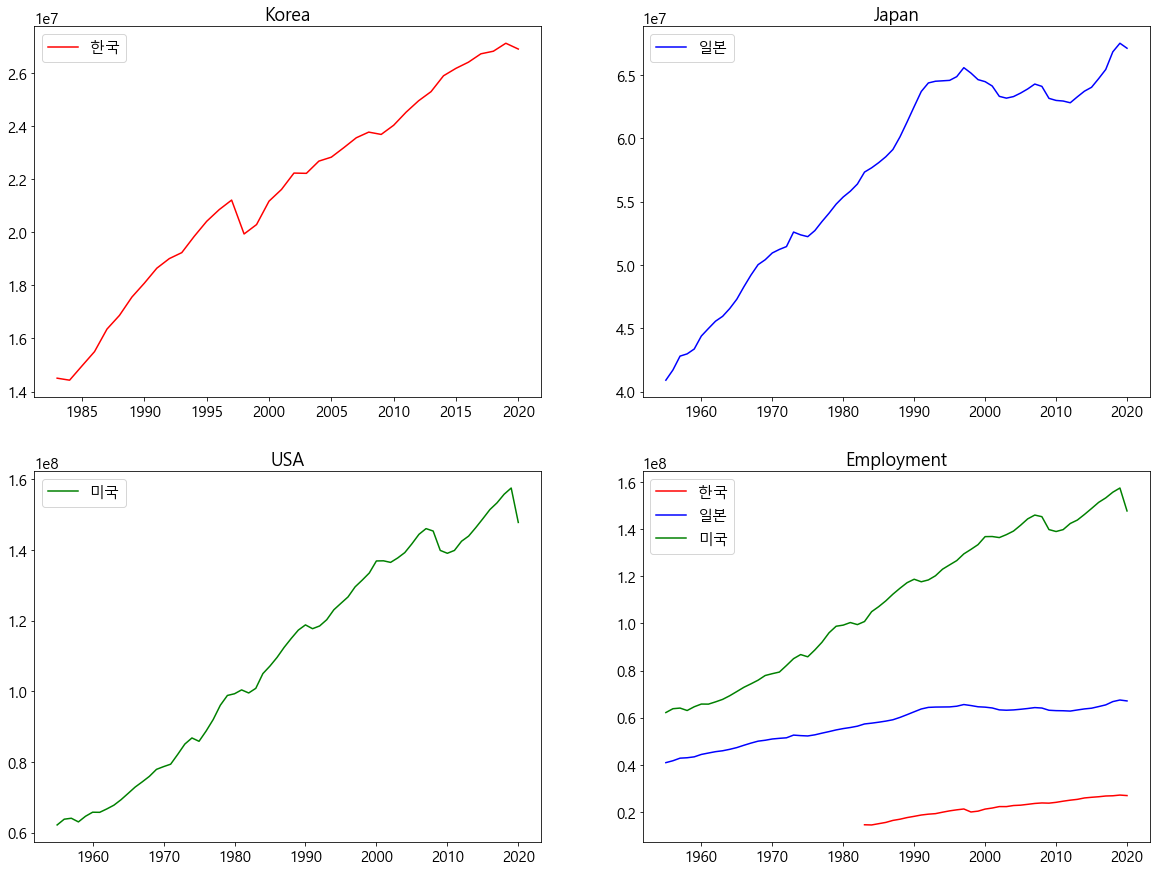

In [289]:
plt.rc("font", family='Malgun Gothic')
plt.rc('font', size=15) 
plt.figure(figsize=(20,15))

ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)

ax1.plot(employment['Year'], employment['Korea'], label='한국', color='red')
ax1.set_title('Korea')
ax1.legend()

ax2.plot(employment['Year'], employment['Japan'], label='일본', color='blue')
ax2.set_title('Japan')
ax2.legend()

ax3.plot(employment['Year'], employment['USA'], label='미국', color='green')
ax3.set_title('USA')
ax3.legend()

ax4.plot(employment['Year'], employment['Korea'], label='한국', color='red')
ax4.plot(employment['Year'], employment['Japan'], label='일본', color='blue')
ax4.plot(employment['Year'], employment['USA'], label='미국', color='green')

ax4.set_title('Employment')
ax4.legend()


In [290]:
employment.to_csv("preprocessed_data/employment.csv", index=False)

# Hours worked

- Hours Worked(노동 시간)

- 단위 : 시간

- 데이터 링크(일본, 미국 데이터) : https://data.oecd.org/emp/hours-worked.htm

- 데이터 설명 

: Average annual hours worked is defined as the total number of hours actually worked per year divided by the average number of people in employment per year. Actual hours worked include regular work hours of full-time, part-time and part-year workers, paid and unpaid overtime, hours worked in additional jobs, and exclude time not worked because of public holidays, annual paid leave, own illness, injury and temporary disability, maternity leave, parental leave, schooling or training, slack work for technical or economic reasons, strike or labour dispute, bad weather, compensation leave and other reasons. The data cover employees and self-employed workers. This indicator is measured in terms of hours per worker per year. The data are published with the following health warning: The data are intended for comparisons of trends over time; they are unsuitable for comparisons of the level of average annual hours of work for a given year, because of differences in their sources and method of calculation.

- 데이터 링크(한국 데이터) : https://www.index.go.kr/unify/idx-info.do?idxCd=4217

- 참고사항 : oecd 통계 사이트에서는 한국의 노동 시간 데이터가 2008년 이후 밖에 존재하지 않았습니다.
            따라서 한국의 노동 시간 데이터는 다른 사이트에서 주당 근로시간 데이터로 구하였고, 이를
            연 단위로 환산하여 사용하였습니다.

In [132]:
korea_hours_worked =  pd.read_csv("raw_data/한국근로시간.csv", encoding='cp949', index_col='Unnamed: 0')
korea_hours_worked = korea_hours_worked.T['전체']

korea_hours_worked = pd.DataFrame(korea_hours_worked)
for i in korea_hours_worked.index:
    korea_hours_worked.at[i, '전체'] = korea_hours_worked.at[i, '전체']*48

korea_hours_worked.index = range(1980, 2022, 1)
korea_hours_worked['TIME'] = range(1980, 2022, 1)
korea_hours_worked.columns = ['Value', 'TIME']
korea_hours_worked['Value'].describe()

count      42.000000
mean     2358.971429
std       241.959305
min      1867.200000
25%      2148.000000
50%      2412.000000
75%      2570.400000
max      2683.200000
Name: Value, dtype: float64

In [159]:
hours_worked =  pd.read_csv("raw_data/hours worked.csv")
hours_worked

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,JPN,HRWKD,TOT,HR_WKD,A,1970,2243,NaN
1,JPN,HRWKD,TOT,HR_WKD,A,1971,2239,NaN
2,JPN,HRWKD,TOT,HR_WKD,A,1972,2228,NaN
3,JPN,HRWKD,TOT,HR_WKD,A,1973,2201,NaN
4,JPN,HRWKD,TOT,HR_WKD,A,1974,2137,NaN
...,...,...,...,...,...,...,...,...
130,USA,HRWKD,TOT,HR_WKD,A,2016,1778,NaN
131,USA,HRWKD,TOT,HR_WKD,A,2017,1778,NaN
132,USA,HRWKD,TOT,HR_WKD,A,2018,1782,NaN
133,USA,HRWKD,TOT,HR_WKD,A,2019,1777,NaN


In [119]:
japan_hours_worked = hours_worked.loc[hours_worked['LOCATION'] == 'JPN']
japan_hours_worked = japan_hours_worked[['TIME', 'Value']]
japan_hours_worked.index = list(japan_hours_worked['TIME'].astype(int))
japan_hours_worked['Value'].describe()

count      51.000000
mean     1927.725490
std       185.744672
min      1598.000000
25%      1773.000000
50%      1892.000000
75%      2105.000000
max      2243.000000
Name: Value, dtype: float64

In [160]:
korea_hours_worked2 = hours_worked.loc[hours_worked['LOCATION'] == 'KOR']
korea_hours_worked2 = korea_hours_worked2[['TIME', 'Value']]
korea_hours_worked2.index = list(korea_hours_worked2['TIME'].astype(int))
korea_hours_worked2['Value'].describe()


count      13.000000
mean     2079.923077
std        89.859577
min      1908.000000
25%      2018.000000
50%      2083.000000
75%      2136.000000
max      2228.000000
Name: Value, dtype: float64

In [126]:
usa_hours_worked = hours_worked.loc[hours_worked['LOCATION'] == 'USA']
usa_hours_worked = usa_hours_worked[['TIME', 'Value']]
usa_hours_worked.index = list(usa_hours_worked['TIME'].astype(int))
usa_hours_worked['Value'].describe()

count      71.000000
mean     1861.845070
std        74.631217
min      1761.000000
25%      1800.500000
50%      1839.000000
75%      1940.500000
max      2003.000000
Name: Value, dtype: float64

In [161]:
hours_worked = pd.concat([usa_hours_worked['TIME'], korea_hours_worked['Value'], japan_hours_worked['Value'], usa_hours_worked['Value'], korea_hours_worked2['Value']], axis=1)
hours_worked.columns = ['Year', 'Korea', 'Japan', 'USA', 'Korea2']
hours_worked

,Year,Korea,Japan,USA,Korea2
1950,1950.0,NaN,NaN,1968.0,NaN
1951,1951.0,NaN,NaN,1987.0,NaN
1952,1952.0,NaN,NaN,1988.0,NaN
1953,1953.0,NaN,NaN,1993.0,NaN
1954,1954.0,NaN,NaN,1984.0,NaN
...,...,...,...,...,...
2017,2017.0,2054.4,1709.0,1778.0,2018.0
2018,2018.0,1992.0,1680.0,1782.0,1993.0
2019,2019.0,1953.6,1644.0,1777.0,1967.0
2020,2020.0,1872.0,1598.0,1767.0,1908.0


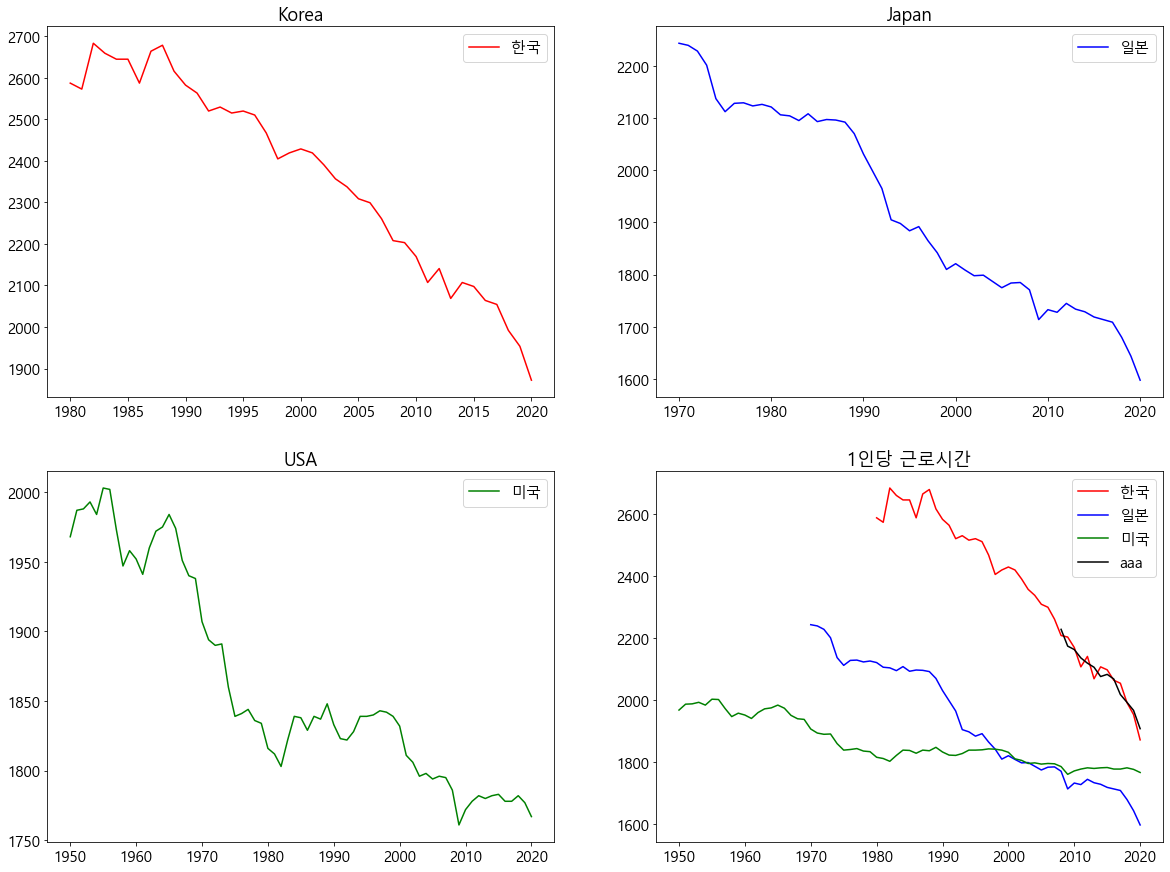

In [162]:
plt.rc("font", family='Malgun Gothic')
plt.rc('font', size=15) 
plt.figure(figsize=(20,15))

ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)

ax1.plot(hours_worked['Year'], hours_worked['Korea'], label='한국', color='red')
ax1.set_title('Korea')
ax1.legend()

ax2.plot(hours_worked['Year'], hours_worked['Japan'], label='일본', color='blue')
ax2.set_title('Japan')
ax2.legend()

ax3.plot(hours_worked['Year'], hours_worked['USA'], label='미국', color='green')
ax3.set_title('USA')
ax3.legend()

ax4.plot(hours_worked['Year'], hours_worked['Korea'], label='한국', color='red')
ax4.plot(hours_worked['Year'], hours_worked['Japan'], label='일본', color='blue')
ax4.plot(hours_worked['Year'], hours_worked['USA'], label='미국', color='green')
ax4.plot(hours_worked['Year'], hours_worked['Korea2'], label='aaa', color='black')

ax4.set_title('1인당 근로시간')
ax4.legend()


In [135]:
hours_worked.to_csv("hours_worked.csv", index=False)

## Employment x Hours Worked => Total Work Hours

In [136]:
korea_labor = korea_employment
japan_labor = japan_employment
usa_labor = usa_employment


#print(korea_labor)
korea_labor.columns = ['Year', 'Employment']
print(korea_labor.head())
japan_labor.columns = ['Year', 'Employment']
print(japan_labor.head())
usa_labor.columns = ['Year', 'Employment']
print(usa_labor.head())

      Year  Employment
1983  1983    14504.67
1984  1984    14428.83
1985  1985    14970.17
1986  1986    15504.83
1987  1987    16354.00
      Year  Employment
1955  1955    40895.83
1956  1956    41705.00
1957  1957    42796.67
1958  1958    42973.33
1959  1959    43356.67
      Year  Employment
1955  1955    62170.33
1956  1956    63800.58
1957  1957    64067.92
1958  1958    63036.33
1959  1959    64629.83


In [141]:
for i in korea_labor.index:
    for j in korea_hours_worked.index:
        if (korea_labor.at[i, 'Year'] == korea_hours_worked.at[j, 'TIME']):
            korea_labor.at[i, 'Hours Worked'] = korea_hours_worked.at[j, 'Value']
            
for i in korea_labor.index:
    if not (np.isnan(korea_labor.at[i, 'Employment']) | np.isnan(korea_labor.at[i, 'Hours Worked']) ):
        korea_labor.at[i, 'Total Work Hours'] = korea_labor.at[i, 'Employment'] * korea_labor.at[i, 'Hours Worked']
        
korea_labor.index = list(range(28,66,1))
korea_labor

,Year,Employment,Hours Worked,Total Work Hours
28,1983,14504.67,2659.2,3.857082e+07
29,1984,14428.83,2644.8,3.816137e+07
30,1985,14970.17,2644.8,3.959311e+07
31,1986,15504.83,2587.2,4.011410e+07
32,1987,16354.00,2664.0,4.356706e+07
33,1988,16869.33,2678.4,4.518281e+07
34,1989,17560.58,2616.0,4.593848e+07
35,1990,18084.75,2582.4,4.670206e+07
36,1991,18648.75,2563.2,4.780048e+07
37,1992,19009.33,2520.0,4.790351e+07


In [142]:
for i in japan_labor.index:
    for j in japan_hours_worked.index:
        if (japan_labor.at[i, 'Year'] == japan_hours_worked.at[j, 'TIME']):
            japan_labor.at[i, 'Hours Worked'] = japan_hours_worked.at[j, 'Value']
            
for i in japan_labor.index:
    if not (np.isnan(japan_labor.at[i, 'Employment']) | np.isnan(japan_labor.at[i, 'Hours Worked']) ):
        japan_labor.at[i, 'Total Work Hours'] = japan_labor.at[i, 'Employment'] * japan_labor.at[i, 'Hours Worked']
        
japan_labor.index = list(range(66))
japan_labor

,Year,Employment,Hours Worked,Total Work Hours
0,1955,40895.83,NaN,NaN
1,1956,41705.00,NaN,NaN
2,1957,42796.67,NaN,NaN
3,1958,42973.33,NaN,NaN
4,1959,43356.67,NaN,NaN
...,...,...,...,...
61,2016,64701.67,1714.0,1.108987e+08
62,2017,65424.17,1709.0,1.118099e+08
63,2018,66820.00,1680.0,1.122576e+08
64,2019,67495.84,1644.0,1.109632e+08


In [143]:
for i in usa_labor.index:
    for j in usa_hours_worked.index:
        if (usa_labor.at[i, 'Year'] == usa_hours_worked.at[j, 'TIME']):
            usa_labor.at[i, 'Hours Worked'] = usa_hours_worked.at[j, 'Value']
            
for i in usa_labor.index:
    if not (np.isnan(usa_labor.at[i, 'Employment']) | np.isnan(usa_labor.at[i, 'Hours Worked']) ):
        usa_labor.at[i, 'Total Work Hours'] = usa_labor.at[i, 'Employment'] * usa_labor.at[i, 'Hours Worked']
        
usa_labor.index = list(range(66))
usa_labor

,Year,Employment,Hours Worked,Total Work Hours
0,1955,62170.33,2003.0,1.245272e+08
1,1956,63800.58,2002.0,1.277288e+08
2,1957,64067.92,1973.0,1.264060e+08
3,1958,63036.33,1947.0,1.227317e+08
4,1959,64629.83,1958.0,1.265452e+08
...,...,...,...,...
61,2016,151435.80,1778.0,2.692529e+08
62,2017,153337.40,1778.0,2.726339e+08
63,2018,155761.00,1782.0,2.775661e+08
64,2019,157538.10,1777.0,2.799452e+08


In [144]:
total_work_hours = pd.concat([usa_labor['Year'], korea_labor['Total Work Hours'], 
                              japan_labor['Total Work Hours'],  usa_labor['Total Work Hours']], axis=1)

total_work_hours.columns=['Year', 'Korea', 'Japan', 'USA']
total_work_hours

,Year,Korea,Japan,USA
0,1955,NaN,NaN,1.245272e+08
1,1956,NaN,NaN,1.277288e+08
2,1957,NaN,NaN,1.264060e+08
3,1958,NaN,NaN,1.227317e+08
4,1959,NaN,NaN,1.265452e+08
...,...,...,...,...
61,2016,5.450840e+07,1.108987e+08,2.692529e+08
62,2017,5.490349e+07,1.118099e+08,2.726339e+08
63,2018,5.342956e+07,1.122576e+08,2.775661e+08
64,2019,5.298691e+07,1.109632e+08,2.799452e+08


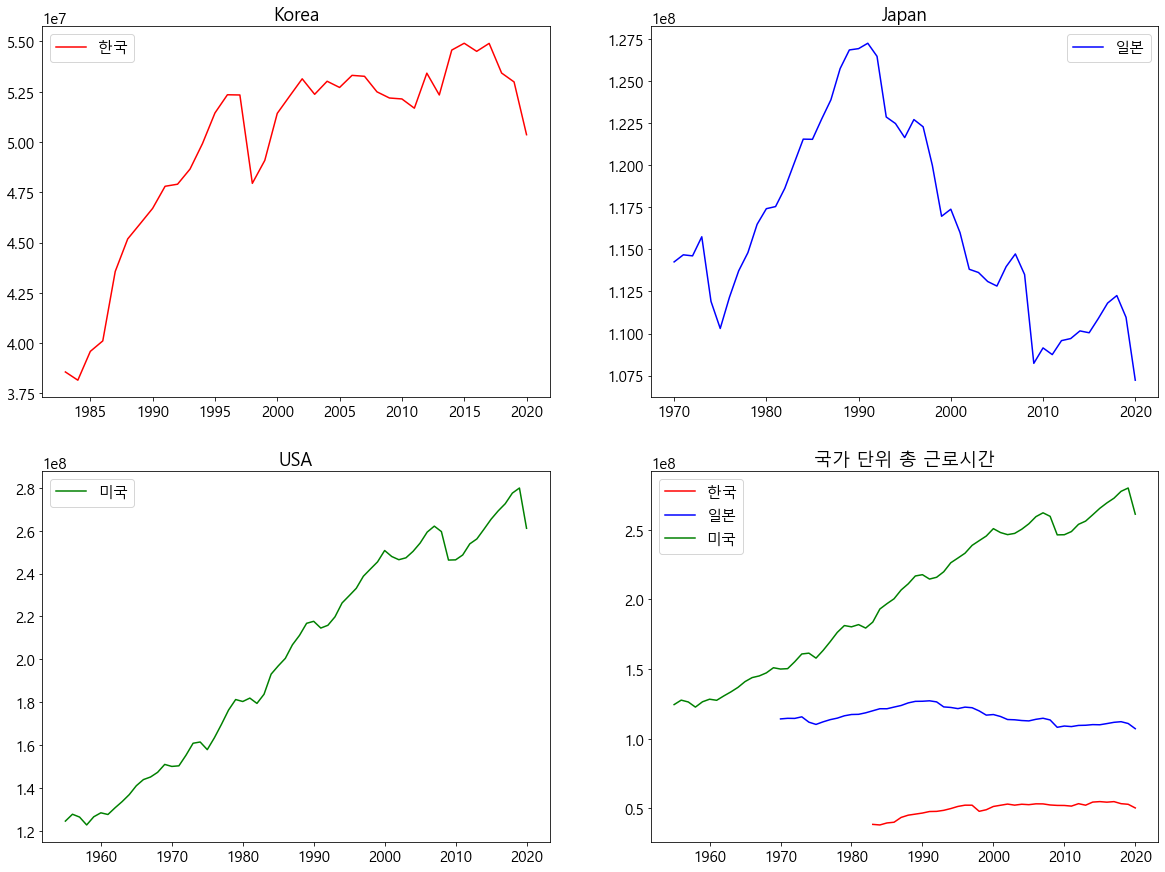

In [150]:
plt.rc("font", family='Malgun Gothic')
plt.rc('font', size=15) 
plt.figure(figsize=(20,15))

ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)

ax1.plot(total_work_hours['Year'], total_work_hours['Korea'], label='한국', color='red')
ax1.set_title('Korea')
ax1.legend()

ax2.plot(total_work_hours['Year'], total_work_hours['Japan'], label='일본', color='blue')
ax2.set_title('Japan')
ax2.legend()

ax3.plot(total_work_hours['Year'], total_work_hours['USA'], label='미국', color='green')
ax3.set_title('USA')
ax3.legend()

ax4.plot(total_work_hours['Year'], total_work_hours['Korea'], label='한국', color='red')
ax4.plot(total_work_hours['Year'], total_work_hours['Japan'], label='일본', color='blue')
ax4.plot(total_work_hours['Year'], total_work_hours['USA'], label='미국', color='green')

ax4.set_title('국가 단위 총 근로시간')
ax4.legend()


## Total Work Hours 로그 적용

In [163]:
total_work_hours_log = pd.concat([total_work_hours['Year'], np.log(total_work_hours['Korea']), np.log(total_work_hours['Japan']), np.log(total_work_hours['USA'])], axis=1)
#total_work_hours_log.rename(columns={'Country Name' : 'Year'}, inplace=True)
total_work_hours_log


,Year,Korea,Japan,USA
0,1955,NaN,NaN,18.640034
1,1956,NaN,NaN,18.665420
2,1957,NaN,NaN,18.655010
3,1958,NaN,NaN,18.625512
4,1959,NaN,NaN,18.656110
...,...,...,...,...
61,2016,17.813865,18.524127,19.411161
62,2017,17.821087,18.532311,19.423640
63,2018,17.793875,18.536307,19.441570
64,2019,17.785555,18.524709,19.450104


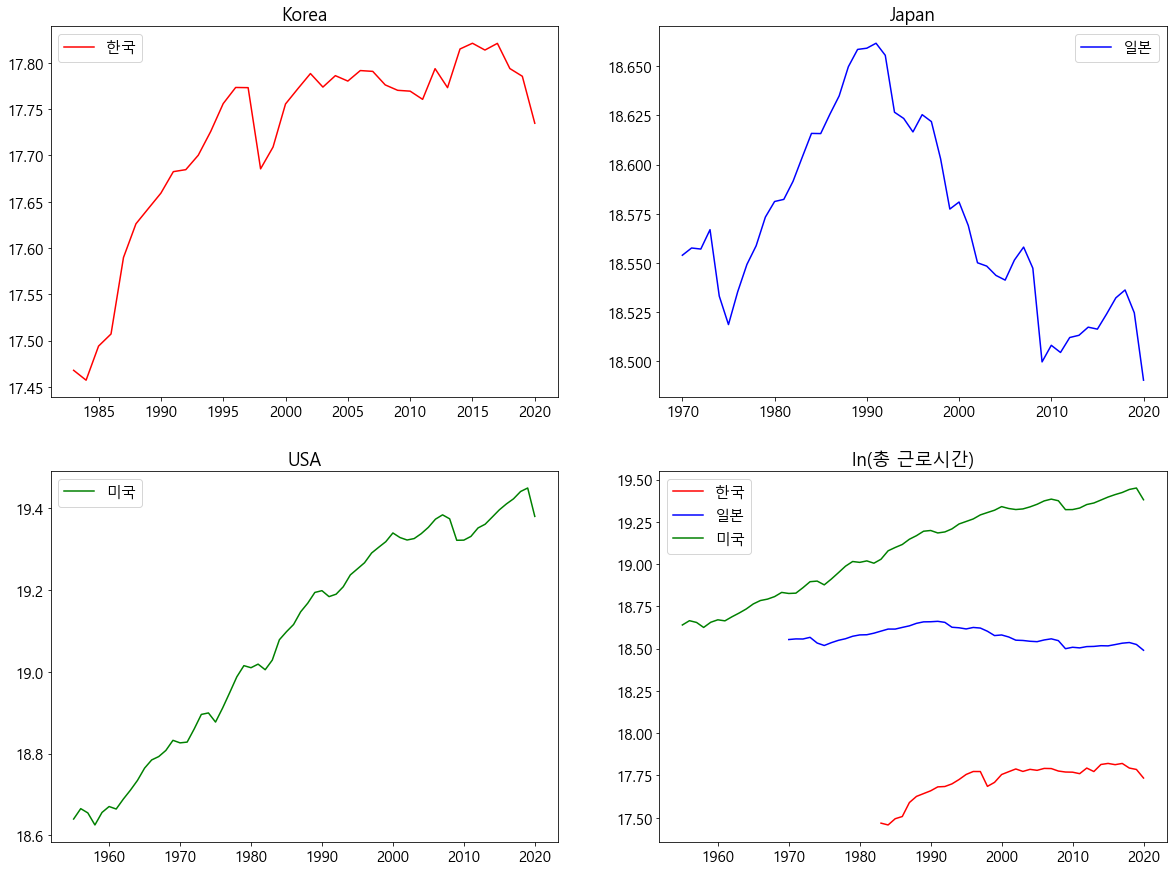

In [164]:
plt.rc("font", family='Malgun Gothic')
plt.rc('font', size=15) 
plt.figure(figsize=(20,15))

ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)

ax1.plot(total_work_hours_log['Year'], total_work_hours_log['Korea'], label='한국', color='red')
ax1.set_title('Korea')
ax1.legend()

ax2.plot(total_work_hours_log['Year'], total_work_hours_log['Japan'], label='일본', color='blue')
ax2.set_title('Japan')
ax2.legend()

ax3.plot(total_work_hours_log['Year'], total_work_hours_log['USA'], label='미국', color='green')
ax3.set_title('USA')
ax3.legend()

ax4.plot(total_work_hours_log['Year'], total_work_hours_log['Korea'], label='한국', color='red')
ax4.plot(total_work_hours_log['Year'], total_work_hours_log['Japan'], label='일본', color='blue')
ax4.plot(total_work_hours_log['Year'], total_work_hours_log['USA'], label='미국', color='green')

ax4.set_title('ln(총 근로시간)')
ax4.legend()


In [165]:
total_work_hours_log.to_csv("total_work_hours_log2.csv", index=False)

# Capital Stock

In [166]:
korea_capital_stock = pd.read_csv("raw_data/korea capital stock.csv")

for i in korea_capital_stock.index:
    korea_capital_stock.at[i, 'DATE'] = int(korea_capital_stock.at[i, 'DATE'].split('-')[0])
    
korea_capital_stock

,DATE,RKNANPKRA666NRUG
0,1953,2.007394e+05
1,1954,1.986611e+05
2,1955,1.972402e+05
3,1956,1.955867e+05
4,1957,1.969652e+05
...,...,...
62,2015,9.813657e+06
63,2016,1.014895e+07
64,2017,1.054494e+07
65,2018,1.089496e+07


In [167]:
capital_stock = korea_capital_stock
capital_stock.rename(columns = {'DATE':'Year', 'RKNANPKRA666NRUG':'Korea'}, inplace=True)
capital_stock

,Year,Korea
0,1953,2.007394e+05
1,1954,1.986611e+05
2,1955,1.972402e+05
3,1956,1.955867e+05
4,1957,1.969652e+05
...,...,...
62,2015,9.813657e+06
63,2016,1.014895e+07
64,2017,1.054494e+07
65,2018,1.089496e+07


In [168]:
japan_capital_stock = pd.read_csv("raw_data/japan capital stock.csv")
for i in japan_capital_stock.index:
    japan_capital_stock.at[i, 'DATE'] = int(japan_capital_stock.at[i, 'DATE'].split('-')[0])
    
japan_capital_stock

,DATE,RKNANPJPA666NRUG
0,1950,9.723618e+05
1,1951,1.025208e+06
2,1952,1.064209e+06
3,1953,1.099585e+06
4,1954,1.143399e+06
...,...,...
65,2015,2.582159e+07
66,2016,2.588077e+07
67,2017,2.596641e+07
68,2018,2.604955e+07


In [169]:
for i in capital_stock.index:
    for j in japan_capital_stock.index:
        if (capital_stock.at[i, 'Year'] == japan_capital_stock.at[j, 'DATE']):
            capital_stock.at[i, 'Japan'] = japan_capital_stock.at[j, 'RKNANPJPA666NRUG']
            
capital_stock

,Year,Korea,Japan
0,1953,2.007394e+05,1.099585e+06
1,1954,1.986611e+05,1.143399e+06
2,1955,1.972402e+05,1.199048e+06
3,1956,1.955867e+05,1.267903e+06
4,1957,1.969652e+05,1.357632e+06
...,...,...,...
62,2015,9.813657e+06,2.582159e+07
63,2016,1.014895e+07,2.588077e+07
64,2017,1.054494e+07,2.596641e+07
65,2018,1.089496e+07,2.604955e+07


In [171]:
usa_capital_stock = pd.read_csv("raw_data/usa capital stock.csv")
for i in usa_capital_stock.index:
    usa_capital_stock.at[i, 'DATE'] = int(usa_capital_stock.at[i, 'DATE'].split('-')[0])
    
usa_capital_stock

,DATE,RKNANPUSA666NRUG
0,1950,10576814
1,1951,10912329
2,1952,11273329
3,1953,11682797
4,1954,12073595
...,...,...
65,2015,65057816
66,2016,65974060
67,2017,66942704
68,2018,68007352


In [172]:
for i in capital_stock.index:
    for j in usa_capital_stock.index:
        if (capital_stock.at[i, 'Year'] == usa_capital_stock.at[j, 'DATE']):
            capital_stock.at[i, 'USA'] = usa_capital_stock.at[j, 'RKNANPUSA666NRUG']
            
capital_stock

,Year,Korea,Japan,USA
0,1953,2.007394e+05,1.099585e+06,11682797.0
1,1954,1.986611e+05,1.143399e+06,12073595.0
2,1955,1.972402e+05,1.199048e+06,12512252.0
3,1956,1.955867e+05,1.267903e+06,12946795.0
4,1957,1.969652e+05,1.357632e+06,13370985.0
...,...,...,...,...
62,2015,9.813657e+06,2.582159e+07,65057816.0
63,2016,1.014895e+07,2.588077e+07,65974060.0
64,2017,1.054494e+07,2.596641e+07,66942704.0
65,2018,1.089496e+07,2.604955e+07,68007352.0


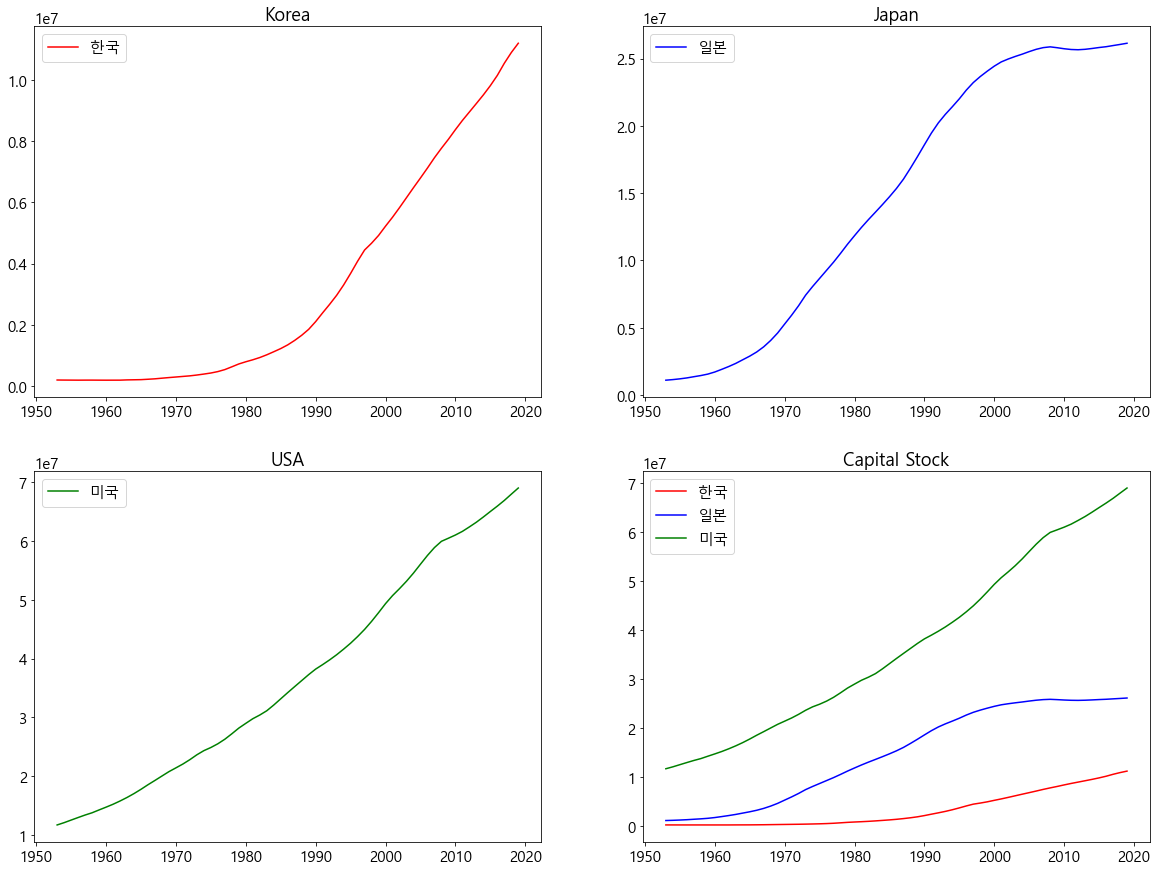

In [174]:
plt.rc("font", family='Malgun Gothic')
plt.rc('font', size=15) 
plt.figure(figsize=(20,15))

ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)

ax1.plot(capital_stock['Year'], capital_stock['Korea'], label='한국', color='red')
ax1.set_title('Korea')
ax1.legend()

ax2.plot(capital_stock['Year'], capital_stock['Japan'], label='일본', color='blue')
ax2.set_title('Japan')
ax2.legend()

ax3.plot(capital_stock['Year'], capital_stock['USA'], label='미국', color='green')
ax3.set_title('USA')
ax3.legend()

ax4.plot(capital_stock['Year'], capital_stock['Korea'], label='한국', color='red')
ax4.plot(capital_stock['Year'], capital_stock['Japan'], label='일본', color='blue')
ax4.plot(capital_stock['Year'], capital_stock['USA'], label='미국', color='green')

ax4.set_title('Capital Stock')
ax4.legend()


In [80]:
capital_stock.to_csv('capital_stock.csv', index=False)

## Capital Stock log 적용

In [175]:
capital_stock_log = pd.concat( [capital_stock['Year'], np.log(capital_stock['Korea']), 
                                np.log(capital_stock['Japan']), np.log(capital_stock['USA'])], axis=1)

capital_stock_log

,Year,Korea,Japan,USA
0,1953,12.209763,13.910443,16.273628
1,1954,12.199356,13.949516,16.306531
2,1955,12.192178,13.997038,16.342219
3,1956,12.183759,14.052875,16.376359
4,1957,12.190783,14.121253,16.408598
...,...,...,...,...
62,2015,16.099286,17.066721,17.990787
63,2016,16.132881,17.069011,18.004772
64,2017,16.171157,17.072314,18.019348
65,2018,16.203811,17.075511,18.035126


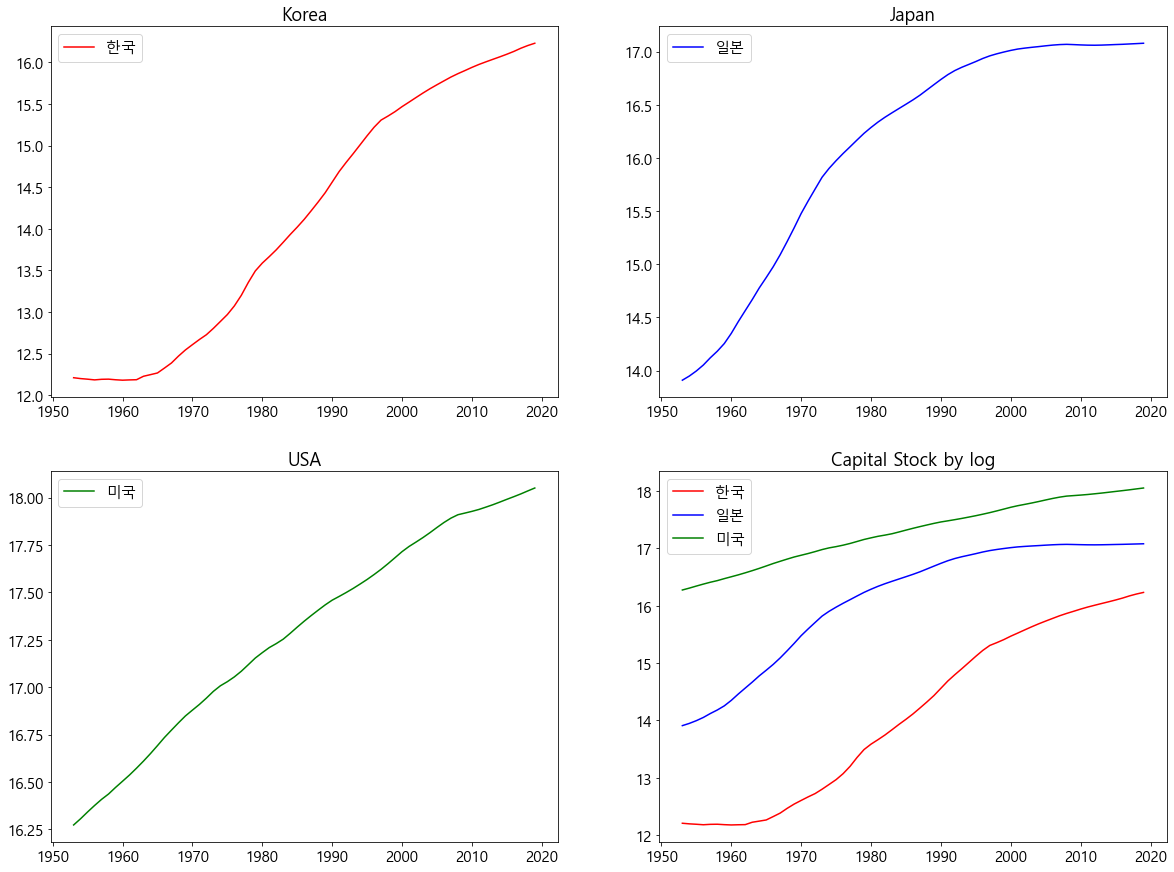

In [177]:
plt.rc("font", family='Malgun Gothic')
plt.rc('font', size=15) 
plt.figure(figsize=(20,15))

ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)

ax1.plot(capital_stock_log['Year'], capital_stock_log['Korea'], label='한국', color='red')
ax1.set_title('Korea')
ax1.legend()

ax2.plot(capital_stock_log['Year'], capital_stock_log['Japan'], label='일본', color='blue')
ax2.set_title('Japan')
ax2.legend()

ax3.plot(capital_stock_log['Year'], capital_stock_log['USA'], label='미국', color='green')
ax3.set_title('USA')
ax3.legend()

ax4.plot(capital_stock_log['Year'], capital_stock_log['Korea'], label='한국', color='red')
ax4.plot(capital_stock_log['Year'], capital_stock_log['Japan'], label='일본', color='blue')
ax4.plot(capital_stock_log['Year'], capital_stock_log['USA'], label='미국', color='green')

ax4.set_title('Capital Stock by log')
ax4.legend()


In [178]:
capital_stock_log.to_csv('capital_stock_log.csv', index=False)